In [1]:
!pip install imblearn
!pip install xgboost 

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from imblearn.pipeline import make_pipeline

from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN

%matplotlib inline

import sys
sys.path.append("..")
from CustomTransformer import CustomTransformer

from pprint import pprint
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline

In [3]:
import os 
os.chdir("../")
bucket = 'aws-project-politomaster-sagemaker-data' 

In [4]:
prep_train_path = os.path.join('s3://', bucket, 'preprocess/prep_train.csv')
prep_train = pd.read_csv(prep_train_path)
print("Prep_train dataset has: {} rows and {} columns".format(prep_train.shape[0], prep_train.shape[1]))
prep_train.head()

Prep_train dataset has: 43170 rows and 10 columns


,carat_class,cut,color,clarity,depth,table,price,x,y,z
0,0,4,5,1,61.746807,54.834605,651.357414,5.350743,4.352193,2.667488
1,0,3,5,2,60.811398,60.300733,651.357414,5.350743,4.352193,2.667488
2,0,1,5,4,59.799569,60.300733,651.357414,5.350743,4.352193,2.667488
3,0,3,1,3,62.110048,57.770527,651.357414,5.350743,4.352193,2.667488
4,0,1,0,1,63.367713,58.202601,651.357414,5.350743,4.352193,2.899670


In [5]:
prep_test_path = os.path.join('s3://', bucket, 'preprocess/prep_test.csv')
prep_test = pd.read_csv(prep_test_path)
print("Prep_test dataset has: {} rows and {} columns".format(prep_test.shape[0], prep_test.shape[1]))
prep_train.head()

Prep_test dataset has: 10770 rows and 10 columns


,carat_class,cut,color,clarity,depth,table,price,x,y,z
0,0,4,5,1,61.746807,54.834605,651.357414,5.350743,4.352193,2.667488
1,0,3,5,2,60.811398,60.300733,651.357414,5.350743,4.352193,2.667488
2,0,1,5,4,59.799569,60.300733,651.357414,5.350743,4.352193,2.667488
3,0,3,1,3,62.110048,57.770527,651.357414,5.350743,4.352193,2.667488
4,0,1,0,1,63.367713,58.202601,651.357414,5.350743,4.352193,2.899670


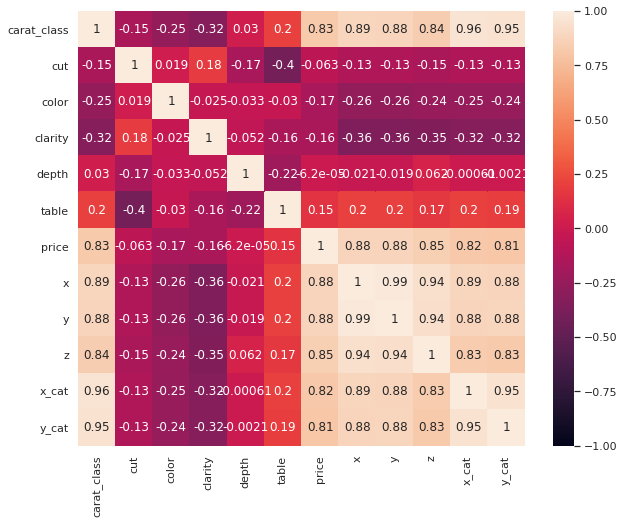

In [6]:
custom_transf = CustomTransformer()
new_train = custom_transf.transform(prep_train)

sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots(1, 1)
sns.heatmap(new_train.corr(), vmin = -1, vmax= 1 , annot = True)
#plt.savefig("images/trainingCorr.png")
plt.show()

In [7]:
seed = 0

target = prep_train['carat_class']
data = prep_train.drop(labels = ['carat_class'],axis = 1)
sample_train, sample_val, label_train, label_val = \
    train_test_split(data, target, test_size=0.3, random_state=seed)

In [8]:
classifiers = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),
                MLPClassifier(), XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
              ]

clf_names = ['Random forest', 'ADAboost', 'GBT', 'MLP',
             'XGBoost']

sampling_techs = [EditedNearestNeighbours(), RandomOverSampler(), SMOTE(random_state=seed)]
sampling_names = ['ENN-Undersample', 'ROS-Oversample','SMOTE']

Classifier:  Random forest
Sampling method:  ENN-Undersample
Time required:  5.693761587142944
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.99      0.98      4785
           2       0.97      0.95      0.96       564

    accuracy                           0.99     12951
   macro avg       0.98      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



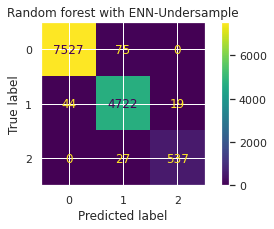

Classifier:  Random forest
Sampling method:  ROS-Oversample
Time required:  8.666341066360474
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7602
           1       0.98      0.99      0.99      4785
           2       0.97      0.94      0.95       564

    accuracy                           0.99     12951
   macro avg       0.98      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



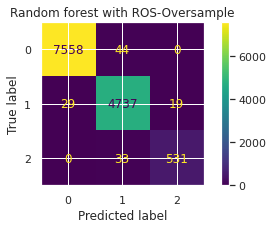

Classifier:  Random forest
Sampling method:  SMOTE
Time required:  11.226555824279785
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.99      0.99      0.99      4785
           2       0.95      0.97      0.96       564

    accuracy                           0.99     12951
   macro avg       0.98      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



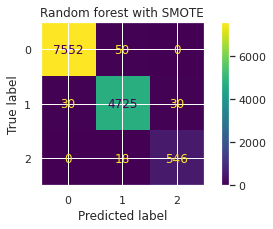

Classifier:  ADAboost
Sampling method:  ENN-Undersample
Time required:  3.3175203800201416
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.96      0.97      4785
           2       0.81      0.97      0.88       564

    accuracy                           0.98     12951
   macro avg       0.93      0.98      0.95     12951
weighted avg       0.98      0.98      0.98     12951



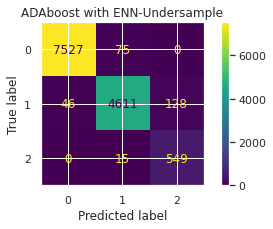

Classifier:  ADAboost
Sampling method:  ROS-Oversample
Time required:  3.750795841217041
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.98      0.97      0.97      4785
           2       0.81      0.97      0.89       564

    accuracy                           0.98     12951
   macro avg       0.93      0.98      0.95     12951
weighted avg       0.98      0.98      0.98     12951



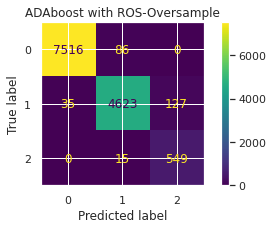

Classifier:  ADAboost
Sampling method:  SMOTE
Time required:  4.827623128890991
              precision    recall  f1-score   support

           0       0.98      0.74      0.85      7602
           1       0.63      0.85      0.72      4785
           2       0.14      0.18      0.16       564

    accuracy                           0.76     12951
   macro avg       0.59      0.59      0.58     12951
weighted avg       0.82      0.76      0.77     12951



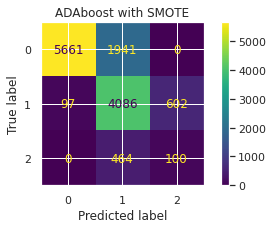

Classifier:  GBT
Sampling method:  ENN-Undersample
Time required:  30.601245164871216
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.98      0.98      4785
           2       0.94      0.96      0.95       564

    accuracy                           0.99     12951
   macro avg       0.97      0.98      0.97     12951
weighted avg       0.99      0.99      0.99     12951



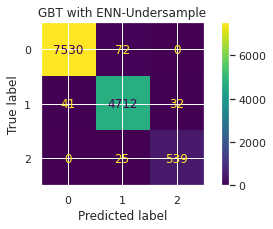

Classifier:  GBT
Sampling method:  ROS-Oversample
Time required:  45.90031313896179
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.99      0.98      0.99      4785
           2       0.93      0.97      0.95       564

    accuracy                           0.99     12951
   macro avg       0.97      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



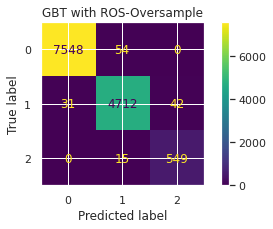

Classifier:  GBT
Sampling method:  SMOTE
Time required:  64.27114772796631
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.99      0.98      0.98      4785
           2       0.92      0.97      0.94       564

    accuracy                           0.99     12951
   macro avg       0.97      0.98      0.97     12951
weighted avg       0.99      0.99      0.99     12951



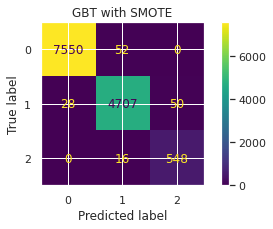

Classifier:  MLP
Sampling method:  ENN-Undersample
Time required:  18.688684701919556
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.99      0.98      4785
           2       0.96      0.95      0.96       564

    accuracy                           0.99     12951
   macro avg       0.98      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



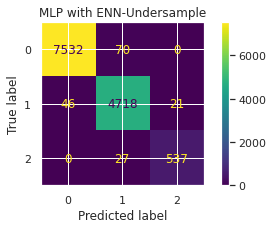

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Classifier:  MLP
Sampling method:  ROS-Oversample
Time required:  56.92914366722107
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7602
           1       0.99      0.99      0.99      4785
           2       0.94      0.97      0.96       564

    accuracy                           0.99     12951
   macro avg       0.98      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



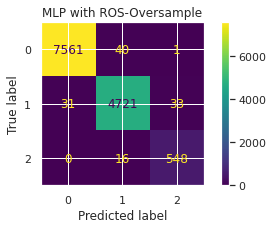

Classifier:  MLP
Sampling method:  SMOTE
Time required:  44.271092891693115
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7602
           1       0.99      0.99      0.99      4785
           2       0.95      0.97      0.96       564

    accuracy                           0.99     12951
   macro avg       0.98      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



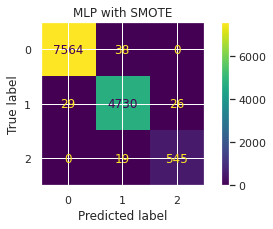

[07:37:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classifier:  XGBoost
Sampling method:  ENN-Undersample
Time required:  6.361156940460205
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7602
           1       0.98      0.99      0.98      4785
           2       0.96      0.96      0.96       564

    accuracy                           0.99     12951
   macro avg       0.98      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



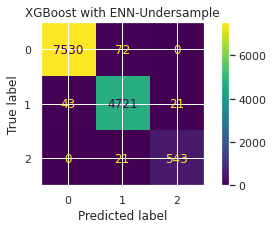

[07:38:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classifier:  XGBoost
Sampling method:  ROS-Oversample
Time required:  12.367840766906738
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7602
           1       0.99      0.99      0.99      4785
           2       0.96      0.97      0.96       564

    accuracy                           0.99     12951
   macro avg       0.98      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



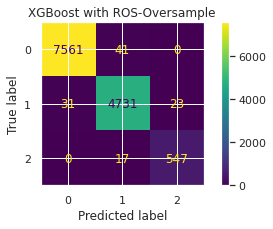

[07:38:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classifier:  XGBoost
Sampling method:  SMOTE
Time required:  18.40441107749939
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.99      0.99      0.99      4785
           2       0.94      0.97      0.95       564

    accuracy                           0.99     12951
   macro avg       0.97      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



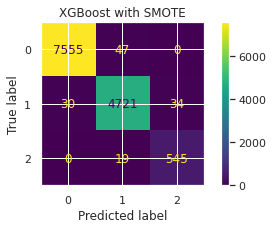



Best accuracy score: 0.9913520191491004
Best classifier: MLP
Best sampling method: SMOTE


In [19]:
best_score = 0
best_clf = ''
best_samp = ''
for clf, clf_name in zip(classifiers,clf_names):
    for samp, samp_name in zip(sampling_techs,sampling_names):
        custom_transf = CustomTransformer()
        std_scale = StandardScaler()
        pca = PCA(n_components=8)
        
        t0 = time.time()
        model = make_pipeline(custom_transf,std_scale,pca,samp,clf)
        model.fit(sample_train, label_train)
        pred = model.predict(sample_val)
        t1 = time.time()
        report = classification_report(label_val,pred, output_dict = True)
        score = report['accuracy']
        if score > best_score:
            best_score = score
            best_clf = clf_name
            best_samp = samp_name
        print('Classifier: ',clf_name)
        print('Sampling method: ',samp_name)
        print('Time required: ',t1-t0)
        print(classification_report(label_val,pred))
        img = sns.set(rc={'figure.figsize':(6,3)})
        plot_confusion_matrix(model, sample_val, label_val) 
        plt.title(clf_name + ' with '+samp_name)
        plt.show()
        
print('\n')
print('Best accuracy score:',best_score)
print('Best classifier:',best_clf)
print('Best sampling method:', best_samp)

# Random Gridsearch

In [9]:
custom_transf = CustomTransformer()
std_scale = StandardScaler()
pca = PCA(n_components=8)
from sklearn.model_selection import RandomizedSearchCV

## Gridsearch on Random forest with ROS and SMOTE

Time required:  2073.073928117752
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7602
           1       0.98      0.99      0.99      4785
           2       0.97      0.95      0.96       564

    accuracy                           0.99     12951
   macro avg       0.98      0.98      0.98     12951
weighted avg       0.99      0.99      0.99     12951



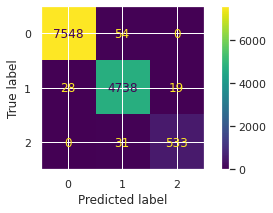

{'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}


In [63]:
pipeline = Pipeline([
    ('samp', RandomOverSampler(random_state = seed)),
    ('clf', RandomForestClassifier( random_state = seed)),
])

parameters = [
    {
        'clf__min_samples_split': [2,5,10],
        'clf__min_samples_leaf': [1,3,5]
    }, {
        'samp' : (SMOTE(random_state = seed),),
        'samp__k_neighbors': [3,5,10],
        'clf__min_samples_split': [2,5,10],
        'clf__min_samples_leaf': [1,3,5]
    }
]

t0 = time.time()
grid_search = RandomizedSearchCV(pipeline, parameters, n_iter = 10)

model = make_pipeline(custom_transf,std_scale, pca, grid_search)
model.fit(sample_train, label_train)
pred = model.predict(sample_val)
t1 = time.time()
print('Time required: ',t1-t0)
print(classification_report(label_val,pred))
sns.set(rc={'figure.figsize':(6,3)})
plot_confusion_matrix(model, sample_val, label_val) 
plt.show()

pprint(model['randomizedsearchcv'].best_params_)

## Gridsearch on MLP with SMOTE 

In [ ]:
pipeline = Pipeline([
    ('samp', SMOTE(random_state = seed)),
    ('clf', MLPClassifier( random_state = seed)),
])

parameters = [
    {
        'samp__k_neighbors': [3,5,10]
    }
]

t0 = time.time()
grid_search = GridSearchCV(pipeline, parameters)

model = make_pipeline(custom_transf,std_scale, pca, grid_search)
model.fit(sample_train, label_train)
pred = model.predict(sample_val)
t1 = time.time()
print('Time required: ',t1-t0)
print(classification_report(label_val,pred))
sns.set(rc={'figure.figsize':(6,3)})
plot_confusion_matrix(model, sample_val, label_val) 
plt.show()

pprint(model['gridsearchcv'].best_params_)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochasti

## Gridsearch on XGBoost with ROS and SMOTE

In [ ]:
pipeline = Pipeline([
    ('samp', RandomOverSampler(random_state = seed)),
    ('clf', XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)),
])

parameters = [
    {
        'clf__booster': ['gbtree', 'gblinear', 'dart'],
    }, {
        'samp' : (SMOTE(random_state = seed),),
        'samp__k_neighbors': [3,5,10],
        'clf__booster': ['gbtree', 'gblinear', 'dart'],
    }
]

t0 = time.time()
grid_search = grid_search = RandomizedSearchCV(pipeline, parameters, n_iter = 10)

model = make_pipeline(custom_transf,std_scale, pca, grid_search)
model.fit(sample_train, label_train)
pred = model.predict(sample_val)
t1 = time.time()
print('Time required: ',t1-t0)
print(classification_report(label_val,pred))
sns.set(rc={'figure.figsize':(6,3)})
plot_confusion_matrix(model, sample_val, label_val) 
plt.show()

pprint(model['randomizedsearchcv'].best_params_)

# Test the model

In [ ]:
samp = 
clf = 

t0 = time.time()
model = make_pipeline(custom_transf,std_scale, pca, samp, clf)
model.fit(sample_train, label_train)
pred = model.predict(sample_val)
t1 = time.time()
print('Time required: ',t1-t0)
print(classification_report(label_val,pred))
sns.set(rc={'figure.figsize':(6,3)})
plot_confusion_matrix(model, sample_val, label_val) 
plt.show()

In [ ]:
test_target = prep_test['carat_class']
test_data = prep_test.drop(labels = ['carat_class'],axis = 1)

t0 = time.time()
model = make_pipeline(custom_transf,std_scale, pca, samp, clf)
model.fit(data, target)
pred = model.predict(test_data)
t1 = time.time()
print('Time required: ',t1-t0)

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (12,6))
sns.countplot(x= target , ax = ax[0]).set_title("Target class distribution in Train")
sns.countplot(x= pred , ax = ax[1]).set_title("Target class distribution in Test")
plt.show()

In [ ]:
a = 10